
# Minor Project



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Minor Project/threads_reviews.csv')
data.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
data.columns

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

In [ ]:
data.duplicated().sum()

1

In [ ]:
data.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


EDA

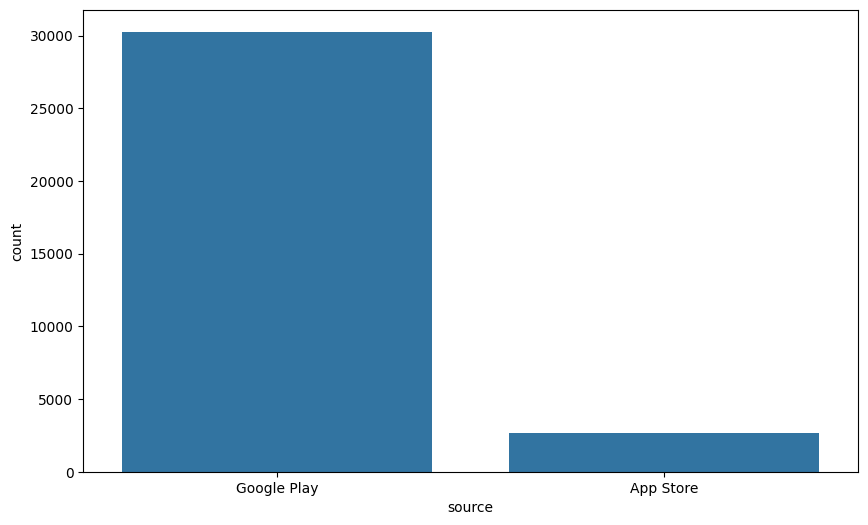

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='source', data=data)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
counts = data['source'].value_counts()
counts = data['source'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])
fig.update_layout(title='source')
fig.show()

<Figure size 2000x2000 with 0 Axes>

In [ ]:
data['rating'].value_counts()

5    15559
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

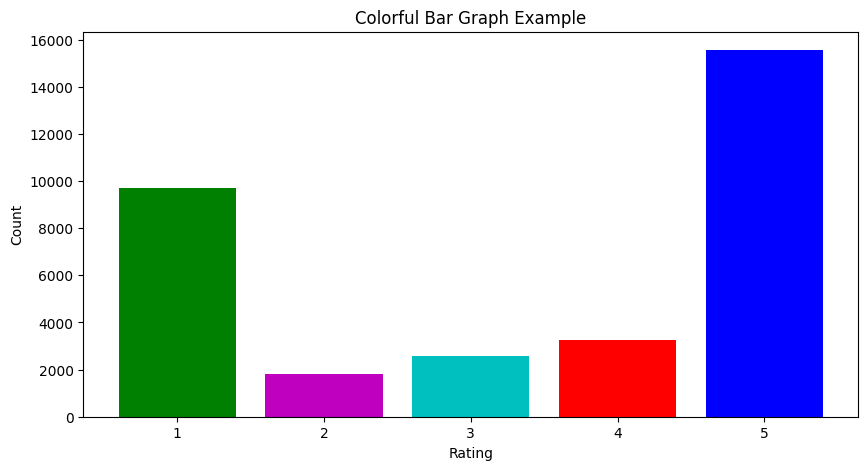

In [ ]:
counts = data['rating'].value_counts()
# Define colors for each bar (as many as your bars)
colors = ['b', 'g', 'r', 'c', 'm', 'y']
# Plotting
plt.figure(figsize=(10,5))
plt.bar(counts.index, counts.values, color=colors)
plt.title('Colorful Bar Graph Example')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
counts = data['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])
fig.update_layout(title='Rating Distribution')
fig.show()

In [ ]:


data['review_date'] = pd.to_datetime(data['review_date']) #converting review_date into date_time format
data['review_date']

0       2023-07-08 14:18:24
1       2023-07-19 20:52:48
2       2023-07-06 23:03:11
3       2023-07-10 00:53:25
4       2023-07-06 16:57:43
                ...        
32905   2023-07-06 01:23:55
32906   2023-07-19 08:01:06
32907   2023-07-17 06:39:13
32908   2023-07-07 17:47:16
32909   2023-07-07 07:01:43
Name: review_date, Length: 32910, dtype: datetime64[ns]

In [ ]:

data1 = data.copy()
data1

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


In [ ]:
data1.set_index('review_date' , inplace = True)

In [ ]:

start_date = data1.index.min()
end_date = data1.index.max()

In [ ]:
print(start_date)
print(end_date)


2023-07-05 22:53:12
2023-07-25 09:42:20


In [ ]:
week = pd.Timedelta(days = 7)
present_date = start_date

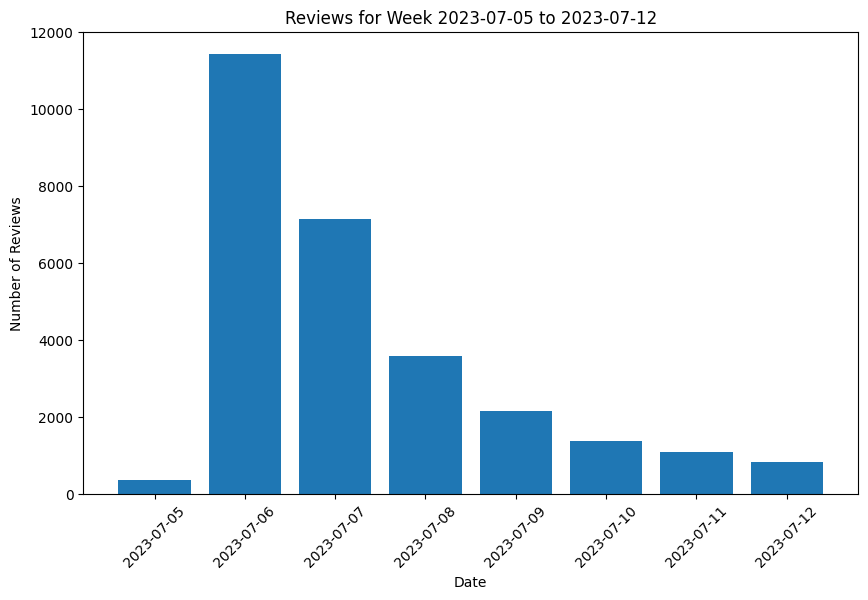

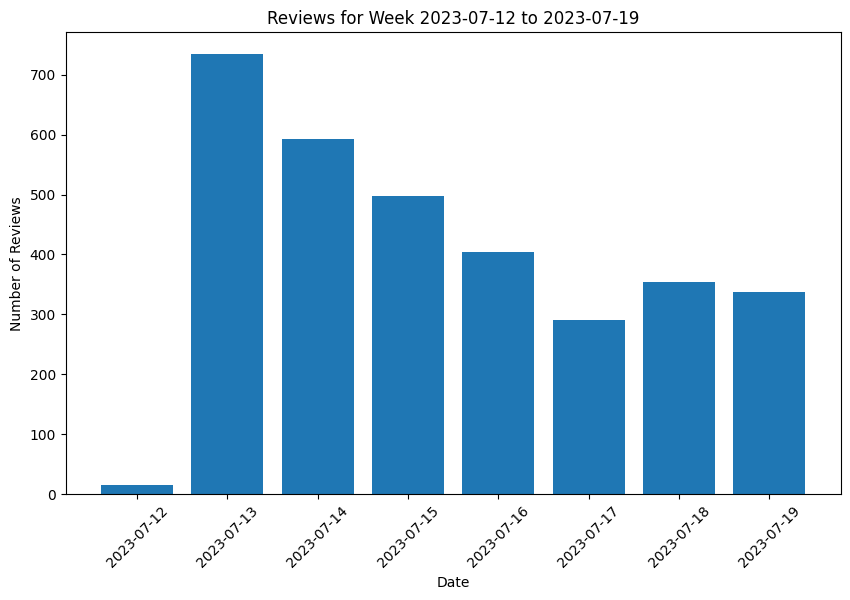

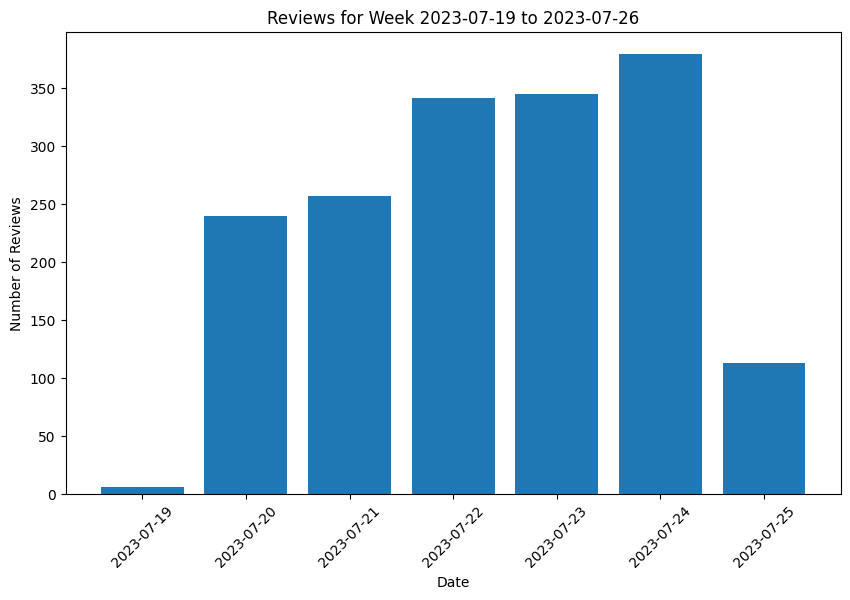

In [ ]:

while present_date <= end_date:
    start_week = present_date
    end_week = present_date + week

    current_week_data = data1[(data1.index >= start_week) & (data1.index < end_week)]
    weekly_counts = current_week_data.resample('D').size()

    plt.figure(figsize=(10,6))
    plt.bar(weekly_counts.index, weekly_counts.values)
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.title(f'Reviews for Week {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
    plt.xticks(rotation=45)
    plt.show()

    present_date += week


In [ ]:


import plotly.graph_objects as go

# Assuming 'data1' is a DataFrame with a 'source' column and a timestamp index
fig = go.Figure()

for source_name, source_data in data1.groupby('source'):
    daily_counts = source_data.resample('D').size()
    fig.add_trace(go.Scatter(x=daily_counts.index, y=daily_counts.values, mode='lines', name=source_name))

fig.update_layout(title='Number of Reviews Day-wise', xaxis_title='Date', yaxis_title='Number of Reviews', xaxis_tickangle=-45)
fig.show()



In [ ]:

import plotly.graph_objects as go

fig = go.Figure()

for rating_val, rating_data in data1.groupby('rating'):
    daily_counts = rating_data.resample('D').size()
    fig.add_trace(go.Scatter(x=daily_counts.index, y=daily_counts.values, mode='lines', name=f'Rating {rating_val}'))

fig.update_layout(title='Number of Reviews Day-wise by Rating', xaxis_title='Date', yaxis_title='Number of Reviews', xaxis_tickangle=-45)
fig.show()



In [ ]:
data['rating'] = data['rating'].map({1: -1, 2: -1, 3: 0, 4: 1, 5: 1})
data
#Ratings of 1 and 2 are being mapped to -1, which could represent negative sentiment.
#A rating of 3 is mapped to 0, representing neutral sentiment.
#Ratings of 4 and 5 are mapped to 1, representing positive sentiment.

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,-1,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,0,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",0,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",0,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",0,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,-1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,-1,2023-07-19 08:01:06
32907,App Store,bad twister,-1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,-1,2023-07-07 17:47:16


In [ ]:
data['rating'].value_counts()

 1    18803
-1    11522
 0     2585
Name: rating, dtype: int64

In [ ]:
data = data.drop(['review_date'] , axis = 1)
data

,source,review_description,rating
0,Google Play,Meh. Not the greatest experience on a Chromebo...,-1
1,Google Play,Pretty good for a first launch!! Its easy to u...,0
2,Google Play,"For a brand new app, it's very well optimized....",0
3,Google Play,"Great app with a lot of potential! However, th...",0
4,Google Play,"The app is good, but it needs a lot of functio...",0
...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,-1
32906,App Store,Add Search and hashtag like Twitter !,-1
32907,App Store,bad twister,-1
32908,App Store,Yet another trash from Meta.,-1


In [ ]:
counts = data['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])
fig.update_layout(title='Rating Distribution')
fig.show()


# Data preprocessing

## Tokenization

In [ ]:

# convert string uppercase to lowercase
data['review_description'] = data['review_description'].str.lower()
data


,source,review_description,rating
0,Google Play,meh. not the greatest experience on a chromebo...,-1
1,Google Play,pretty good for a first launch!! its easy to u...,0
2,Google Play,"for a brand new app, it's very well optimized....",0
3,Google Play,"great app with a lot of potential! however, th...",0
4,Google Play,"the app is good, but it needs a lot of functio...",0
...,...,...,...
32905,App Store,this killed my dog. mark zuckerburg strangled ...,-1
32906,App Store,add search and hashtag like twitter !,-1
32907,App Store,bad twister,-1
32908,App Store,yet another trash from meta.,-1


In [ ]:
# Punctuation removing
data['review_description'] = data['review_description'].str.replace('[^\w\s]','')
data

<ipython-input-30-5e77b7af5b97>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,source,review_description,rating
0,Google Play,meh not the greatest experience on a chromeboo...,-1
1,Google Play,pretty good for a first launch its easy to use...,0
2,Google Play,for a brand new app its very well optimized ho...,0
3,Google Play,great app with a lot of potential however ther...,0
4,Google Play,the app is good but it needs a lot of function...,0
...,...,...,...
32905,App Store,this killed my dog mark zuckerburg strangled h...,-1
32906,App Store,add search and hashtag like twitter,-1
32907,App Store,bad twister,-1
32908,App Store,yet another trash from meta,-1


In [ ]:

import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# Apply the function to the 'review_description' column
data['review_description'] = data['review_description'].apply(remove_emojis)
data
# Now df['review_description'] no longer contains any emojis


,source,review_description,rating
0,Google Play,meh not the greatest experience on a chromeboo...,-1
1,Google Play,pretty good for a first launch its easy to use...,0
2,Google Play,for a brand new app its very well optimized ho...,0
3,Google Play,great app with a lot of potential however ther...,0
4,Google Play,the app is good but it needs a lot of function...,0
...,...,...,...
32905,App Store,this killed my dog mark zuckerburg strangled h...,-1
32906,App Store,add search and hashtag like twitter,-1
32907,App Store,bad twister,-1
32908,App Store,yet another trash from meta,-1


In [ ]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# Apply the function to the 'review_description' column
data['review_description'] = data['review_description'].apply(remove_urls)
data
# Now df['review_description'] no longer contains any URLs


,source,review_description,rating
0,Google Play,meh not the greatest experience on a chromeboo...,-1
1,Google Play,pretty good for a first launch its easy to use...,0
2,Google Play,for a brand new app its very well optimized ho...,0
3,Google Play,great app with a lot of potential however ther...,0
4,Google Play,the app is good but it needs a lot of function...,0
...,...,...,...
32905,App Store,this killed my dog mark zuckerburg strangled h...,-1
32906,App Store,add search and hashtag like twitter,-1
32907,App Store,bad twister,-1
32908,App Store,yet another trash from meta,-1


In [ ]:
# Assuming df is your DataFrame and 'review_description' is the column of interest
data['review_description'] = data['review_description'].str.replace('\d+', '')
data

<ipython-input-33-300e038cde3e>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,source,review_description,rating
0,Google Play,meh not the greatest experience on a chromeboo...,-1
1,Google Play,pretty good for a first launch its easy to use...,0
2,Google Play,for a brand new app its very well optimized ho...,0
3,Google Play,great app with a lot of potential however ther...,0
4,Google Play,the app is good but it needs a lot of function...,0
...,...,...,...
32905,App Store,this killed my dog mark zuckerburg strangled h...,-1
32906,App Store,add search and hashtag like twitter,-1
32907,App Store,bad twister,-1
32908,App Store,yet another trash from meta,-1


In [ ]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for sublist in sample_text for w in sublist.split() if not w.isdigit()])
    return clean_text
data

,source,review_description,rating
0,Google Play,meh not the greatest experience on a chromeboo...,-1
1,Google Play,pretty good for a first launch its easy to use...,0
2,Google Play,for a brand new app its very well optimized ho...,0
3,Google Play,great app with a lot of potential however ther...,0
4,Google Play,the app is good but it needs a lot of function...,0
...,...,...,...
32905,App Store,this killed my dog mark zuckerburg strangled h...,-1
32906,App Store,add search and hashtag like twitter,-1
32907,App Store,bad twister,-1
32908,App Store,yet another trash from meta,-1


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')



# If you haven't downloaded the stopword package, you need to download it
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stop words from tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Ensure all elements in 'review_description' are strings
data['review_description'] = data['review_description'].astype(str)

# Tokenize the reviews and remove stop words
data['review_description'] = data['review_description'].apply(nltk.word_tokenize).apply(remove_stopwords)
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,source,review_description,rating
0,Google Play,"[meh, greatest, experience, chromebook, seems,...",-1
1,Google Play,"[pretty, good, first, launch, easy, use, selfe...",0
2,Google Play,"[brand, new, app, well, optimized, however, mi...",0
3,Google Play,"[great, app, lot, potential, however, lot, nee...",0
4,Google Play,"[app, good, needs, lot, functionality, example...",0
...,...,...,...
32905,App Store,"[killed, dog, mark, zuckerburg, strangled, dog...",-1
32906,App Store,"[add, search, hashtag, like, twitter]",-1
32907,App Store,"[bad, twister]",-1
32908,App Store,"[yet, another, trash, meta]",-1


In [ ]:




import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    # Ensure the input is a string to avoid TypeError
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word) for word in words])
    else:
        return text  # Return the original value if it's not a string

# Apply the function to the 'review_description' column
data['review_description'] = data['review_description'].apply(lemmatize_text)
data


[nltk_data] Downloading package wordnet to /root/nltk_data...


,source,review_description,rating
0,Google Play,"[meh, greatest, experience, chromebook, seems,...",-1
1,Google Play,"[pretty, good, first, launch, easy, use, selfe...",0
2,Google Play,"[brand, new, app, well, optimized, however, mi...",0
3,Google Play,"[great, app, lot, potential, however, lot, nee...",0
4,Google Play,"[app, good, needs, lot, functionality, example...",0
...,...,...,...
32905,App Store,"[killed, dog, mark, zuckerburg, strangled, dog...",-1
32906,App Store,"[add, search, hashtag, like, twitter]",-1
32907,App Store,"[bad, twister]",-1
32908,App Store,"[yet, another, trash, meta]",-1


In [ ]:
data = data.drop(['source'],axis=1)
data

,review_description,rating
0,"[meh, greatest, experience, chromebook, seems,...",-1
1,"[pretty, good, first, launch, easy, use, selfe...",0
2,"[brand, new, app, well, optimized, however, mi...",0
3,"[great, app, lot, potential, however, lot, nee...",0
4,"[app, good, needs, lot, functionality, example...",0
...,...,...
32905,"[killed, dog, mark, zuckerburg, strangled, dog...",-1
32906,"[add, search, hashtag, like, twitter]",-1
32907,"[bad, twister]",-1
32908,"[yet, another, trash, meta]",-1


## Polarity calculation

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


# Assuming 'df' is your DataFrame containing the review descriptions and ratings

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate polarity score for a given review
def calculate_polarity(review_tokens):
    review_text = ' '.join(review_tokens)
    polarity_score = sia.polarity_scores(review_text)
    return polarity_score['compound']  # Extract compound polarity score

# Apply polarity calculation to each review description
data['polarity_score'] = data['review_description'].apply(calculate_polarity)
data
# Now, 'df' contains the polarity score for each review description


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,review_description,rating,polarity_score
0,"[meh, greatest, experience, chromebook, seems,...",-1,0.8834
1,"[pretty, good, first, launch, easy, use, selfe...",0,0.9888
2,"[brand, new, app, well, optimized, however, mi...",0,0.8940
3,"[great, app, lot, potential, however, lot, nee...",0,0.5656
4,"[app, good, needs, lot, functionality, example...",0,0.8481
...,...,...,...
32905,"[killed, dog, mark, zuckerburg, strangled, dog...",-1,-0.8402
32906,"[add, search, hashtag, like, twitter]",-1,0.3612
32907,"[bad, twister]",-1,-0.5423
32908,"[yet, another, trash, meta]",-1,0.0000


In [ ]:
def find_sentiment(polarity_score):
    if polarity_score >= 0.0 and polarity_score<=1.0:
        return 'positive'
    elif polarity_score < 0 and polarity_score>=-1:
        return 'negative'
    else:
        return 'None'

# # Apply polarity calculation to each review description
# data['polarity_score'] = data['review_description'].apply(calculate_polarity)

# Apply find_sentiment function to assign sentiment labels
data['sentiment'] = data['polarity_score'].apply(find_sentiment)

In [ ]:
data

,review_description,rating,polarity_score,sentiment
0,"[meh, greatest, experience, chromebook, seems,...",-1,0.8834,positive
1,"[pretty, good, first, launch, easy, use, selfe...",0,0.9888,positive
2,"[brand, new, app, well, optimized, however, mi...",0,0.8940,positive
3,"[great, app, lot, potential, however, lot, nee...",0,0.5656,positive
4,"[app, good, needs, lot, functionality, example...",0,0.8481,positive
...,...,...,...,...
32905,"[killed, dog, mark, zuckerburg, strangled, dog...",-1,-0.8402,negative
32906,"[add, search, hashtag, like, twitter]",-1,0.3612,positive
32907,"[bad, twister]",-1,-0.5423,negative
32908,"[yet, another, trash, meta]",-1,0.0000,positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform 'sentiment' column
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Now, 'data' contains a new column 'sentiment_encoded' with label-encoded sentiment values
data

,review_description,rating,polarity_score,sentiment,sentiment_encoded
0,"[meh, greatest, experience, chromebook, seems,...",-1,0.8834,positive,1
1,"[pretty, good, first, launch, easy, use, selfe...",0,0.9888,positive,1
2,"[brand, new, app, well, optimized, however, mi...",0,0.8940,positive,1
3,"[great, app, lot, potential, however, lot, nee...",0,0.5656,positive,1
4,"[app, good, needs, lot, functionality, example...",0,0.8481,positive,1
...,...,...,...,...,...
32905,"[killed, dog, mark, zuckerburg, strangled, dog...",-1,-0.8402,negative,0
32906,"[add, search, hashtag, like, twitter]",-1,0.3612,positive,1
32907,"[bad, twister]",-1,-0.5423,negative,0
32908,"[yet, another, trash, meta]",-1,0.0000,positive,1


In [ ]:
import numpy as np

# Convert lists of words to strings
data['review_description_str'] = data['review_description'].apply(lambda x: ' '.join(x))

# Create NumPy array from the modified column
X = np.array(data['review_description_str'].tolist())
y = data['sentiment_encoded']
data

,review_description,rating,polarity_score,sentiment,sentiment_encoded,review_description_str
0,"[meh, greatest, experience, chromebook, seems,...",-1,0.8834,positive,1,meh greatest experience chromebook seems custo...
1,"[pretty, good, first, launch, easy, use, selfe...",0,0.9888,positive,1,pretty good first launch easy use selfexplanat...
2,"[brand, new, app, well, optimized, however, mi...",0,0.8940,positive,1,brand new app well optimized however missing q...
3,"[great, app, lot, potential, however, lot, nee...",0,0.5656,positive,1,great app lot potential however lot needs fixe...
4,"[app, good, needs, lot, functionality, example...",0,0.8481,positive,1,app good needs lot functionality example searc...
...,...,...,...,...,...,...
32905,"[killed, dog, mark, zuckerburg, strangled, dog...",-1,-0.8402,negative,0,killed dog mark zuckerburg strangled dog gone
32906,"[add, search, hashtag, like, twitter]",-1,0.3612,positive,1,add search hashtag like twitter
32907,"[bad, twister]",-1,-0.5423,negative,0,bad twister
32908,"[yet, another, trash, meta]",-1,0.0000,positive,1,yet another trash meta


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# # Assuming X contains preprocessed text data and y contains label-encoded sentiment values

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # Maximum number of words to tokenize
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_len = 100  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

embedding_dim = 100  # Dimension of word embeddings
vocab_size = min(max_words, len(tokenizer.word_index) + 1)  # Vocabulary size
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # First LSTM layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 20
# Train the model
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))




Epoch 1/20
103/103 [==============================] - 63s 530ms/step - loss: 0.4285 - accuracy: 0.8573 - val_loss: 0.4138 - val_accuracy: 0.8537
Epoch 2/20
103/103 [==============================] - 45s 434ms/step - loss: 0.3820 - accuracy: 0.8637 - val_loss: 0.3326 - val_accuracy: 0.8938
Epoch 3/20
103/103 [==============================] - 44s 432ms/step - loss: 0.2387 - accuracy: 0.9268 - val_loss: 0.2786 - val_accuracy: 0.8839
Epoch 4/20
103/103 [==============================] - 42s 405ms/step - loss: 0.1966 - accuracy: 0.9400 - val_loss: 0.2702 - val_accuracy: 0.9078
Epoch 5/20
103/103 [==============================] - 41s 399ms/step - loss: 0.1894 - accuracy: 0.9422 - val_loss: 0.2542 - val_accuracy: 0.9208
Epoch 6/20
103/103 [==============================] - 41s 396ms/step - loss: 0.1768 - accuracy: 0.9499 - val_loss: 0.2752 - val_accuracy: 0.9068
Epoch 7/20
103/103 [==============================] - 40s 387ms/step - loss: 0.1609 - accuracy: 0.9557 - val_loss: 0.2723 - val_ac

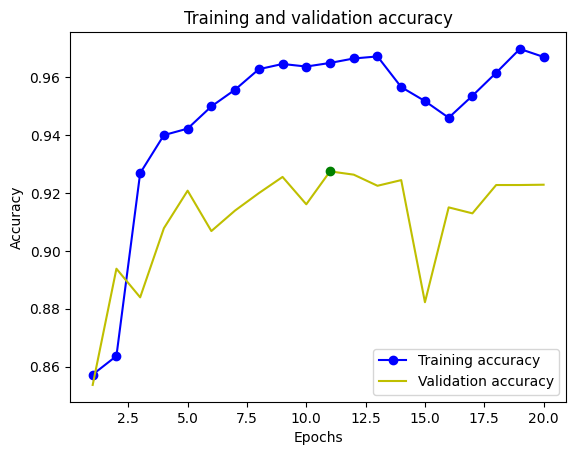

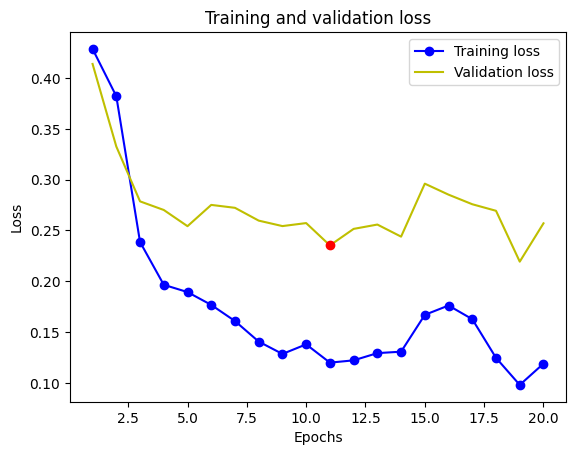

In [ ]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1

# Plotting accuracy
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'y', label='Validation accuracy')
plt.plot(best_epoch, val_accuracy[best_epoch - 1], 'go')  # Highlighting best epoch
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.plot(best_epoch, val_loss[best_epoch - 1], 'ro')  # Highlighting best epoch
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Extract training and validation accuracy and loss from history
history_dict = history.history
train_accuracy = round(history_dict['accuracy'][-1], 2)
val_accuracy = round(history_dict['val_accuracy'][-1], 2)
train_loss = round(history_dict['loss'][-1], 2)
val_loss = round(history_dict['val_loss'][-1], 2)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)


Training Accuracy: 0.97
Validation Accuracy: 0.92
Training Loss: 0.12
Validation Loss: 0.26


In [ ]:
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()


In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt


# # Assuming df_new is your DataFrame and 'review_description' is the column with text
# df = data.review_description

# # Join the words in each list into a string
# df = df.apply(' '.join)

# # Create a WordCloud object
# wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False)

# # Generate a word cloud
# wc.generate(" ".join(df))

# # Create a plot
# plt.figure(figsize=(15, 20))

# # Display the WordCloud
# plt.imshow(wc)

# # Remove the axis
# plt.axis('off')

# # Show the plot
# plt.show()


In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Filter rows where 'rating' is 1 and select 'review_description' column
# data2 = df[data['rating']==1]

# plt.figure(figsize=(20,20))
# # Generate word cloud
# wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data2))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()


In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Filter rows where 'rating' is 0 and select 'review_description' column
# data3 = df[data['rating']==0]

# plt.figure(figsize=(20,20))
# # Generate word cloud
# wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data3))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()


In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Filter rows where 'rating' is -1 and select 'review_description' column
# data4 = df[data['rating']== -1]

# plt.figure(figsize=(20,20))
# # Generate word cloud
# wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data4))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()

## Model Bulding